In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [5]:
ams_df = pd.read_csv('AW_AveMonthSpend.csv')
bike_buyers_df = pd.read_csv('AW_BikeBuyer.csv')
cust_df = pd.read_csv('AdvWorksCusts.csv')

In [9]:
# AWS_dataset = pd.concat([AWS_df1, AWS_df2, AWS_df3])
AWS_dataset = cust_df
AWS_dataset['AveMonthSpend'] = ams_df['AveMonthSpend']
AWS_dataset.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Bachelors,Professional,M,M,1,0,0,2,137947,89
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Bachelors,Professional,M,S,0,1,3,3,101141,117
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Bachelors,Professional,M,M,1,1,3,3,91945,123
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Bachelors,Professional,F,S,0,1,0,0,86688,50
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Bachelors,Professional,F,S,1,4,5,5,92771,95


In [6]:
AWS_dataset['AveMonthSpend'].describe()

count    16519.000000
mean        72.405957
std         27.285370
min         22.000000
25%         52.000000
50%         68.000000
75%         84.000000
max        176.000000
Name: AveMonthSpend, dtype: float64

In [35]:
AWS_dataset['BikeBuyer'] = bike_buyers_df['BikeBuyer']
AWS_dataset['BikeBuyer'].value_counts()

0    11030
1     5489
Name: BikeBuyer, dtype: int64

In [10]:
AWS_dataset.groupby(['Occupation']).median()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend
Occupation,,,,,,,
Clerical,20878.0,1.0,1.0,0.0,1.0,49387.0,62.0
Management,19685.5,1.0,2.0,1.0,3.0,118780.0,79.0
Manual,20794.5,1.0,1.0,0.0,1.0,21722.5,57.0
Professional,20216.0,1.0,2.0,1.0,2.0,99046.0,77.0
Skilled Manual,20271.0,1.0,1.0,0.0,1.0,66481.0,66.0


In [11]:
AWS_dataset.groupby(['MaritalStatus']).median()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend
MaritalStatus,,,,,,,
M,19827.0,1.0,2.0,0.0,2.0,81942.0,74.0
S,20908.5,1.0,1.0,0.0,1.0,68711.0,62.0


In [12]:
AWS_dataset.groupby(['Gender']).median()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend
Gender,,,,,,,
F,20182.5,1.0,2.0,0.0,2.0,70886.5,52.0
M,20262.0,1.0,2.0,0.0,2.0,84726.0,79.0


In [13]:
AWS_dataset.groupby(['NumberChildrenAtHome']).median()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,TotalChildren,YearlyIncome,AveMonthSpend
NumberChildrenAtHome,,,,,,
0,20240.0,1.0,1.0,1.0,66932.5,57.0
1,20989.0,1.0,1.0,2.0,70958.0,68.0
2,19689.5,1.0,1.0,2.0,80453.0,79.0
3,20043.0,1.0,2.0,3.0,97095.5,89.5
4,19642.5,1.0,3.0,4.0,117656.0,101.0
5,19974.5,1.0,3.0,5.0,125559.5,110.0


In [17]:
AWS_dataset['BirthDate'] = pd.to_datetime(AWS_dataset['BirthDate'])
AWS_dataset['Age'] = [1998 - int(x) for x in AWS_dataset['BirthDate'].dt.year]
AWS_dataset[['BirthDate', 'Age']].head(20)

,BirthDate,Age
0,1966-04-08,32
1,1965-05-14,33
2,1965-08-12,33
3,1968-02-15,30
4,1968-08-08,30
5,1965-08-05,33
6,1965-12-06,33
7,1964-05-09,34
8,1964-07-07,34
9,1964-04-01,34


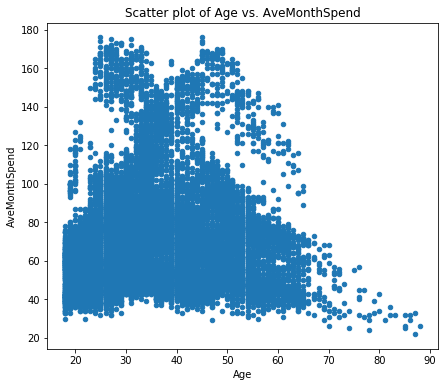

In [20]:
fig = plt.figure(figsize=(7,6)) # define plot area
ax = fig.gca() # define axis   
AWS_dataset.plot.scatter(x = 'Age', y = 'AveMonthSpend', ax = ax)
ax.set_title('Scatter plot of Age vs. AveMonthSpend') # Give the plot a main title
ax.set_xlabel('Age') # Set text for the x axis
ax.set_ylabel('AveMonthSpend')# Set text for y axis
plt.show()

C:\Users\EAZETNG\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'marker', 'label', 'scatter_kws', 'fit_reg'
  s)
C:\Users\EAZETNG\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'marker', 'label', 'scatter_kws', 'fit_reg'
  s)
No handles with labels found to put in legend.


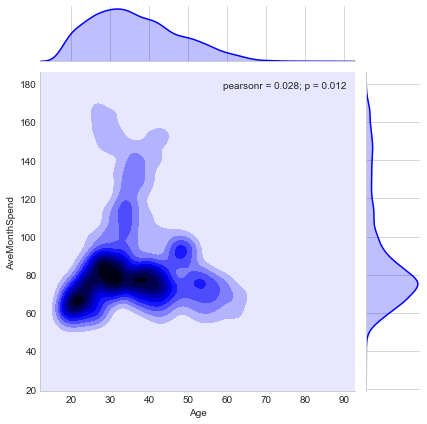

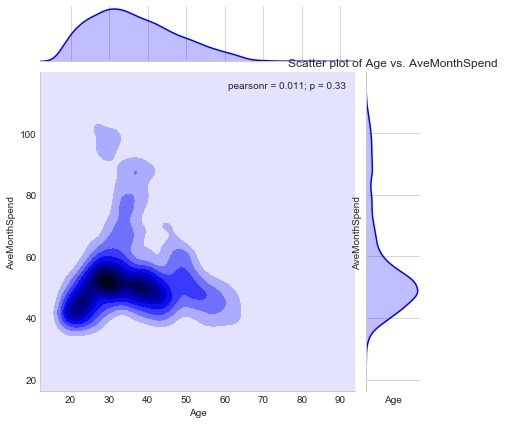

In [24]:
shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
unique_cats = AWS_dataset['Gender'].unique()
sns.set_style("whitegrid")
for i, cat in enumerate(unique_cats): # loop over the unique categories
    temp = AWS_dataset[AWS_dataset['Gender'] == cat]
    sns.jointplot('Age', 'AveMonthSpend', data=temp, marker = shapes[i], label = cat,
                scatter_kws={"alpha":0.2}, fit_reg = False, color = 'blue', kind ='kde')
plt.title('Scatter plot of Age vs. AveMonthSpend') # Give the plot a main title
plt.xlabel('Age') # Set text for the x axis
plt.ylabel('AveMonthSpend')# Set text for y axis
plt.legend()
plt.show()


In [26]:
AWS_dataset['Gender'].value_counts()

M    8351
F    8168
Name: Gender, dtype: int64

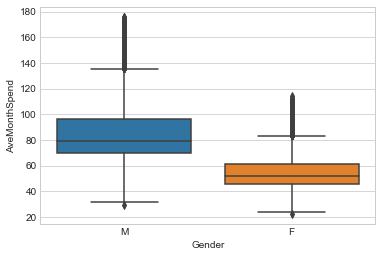

In [28]:
def plot_box(dataset, col_x = 'Gender', col_y = 'AveMonthSpend'):
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col_y, data=dataset)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_box(AWS_dataset)

In [29]:
AWS_dataset.groupby(['Gender']).mean()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,Age
Gender,,,,,,,,
F,20185.410015,0.675441,1.498898,0.991308,2.010651,71355.231024,56.631978,36.500367
M,20281.970662,0.672375,1.503054,0.992695,2.001916,84741.496946,87.834271,36.415160


In [36]:
AWS_dataset.groupby(['BikeBuyer']).median()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,Age
BikeBuyer,,,,,,,,
0,20286.5,1.0,1.0,0.0,1.0,65955.5,60.0,37.0
1,20055.0,1.0,2.0,2.0,3.0,96122.0,82.0,34.0


Occupation


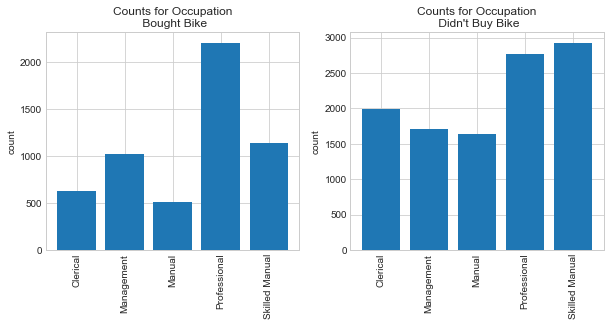

Gender


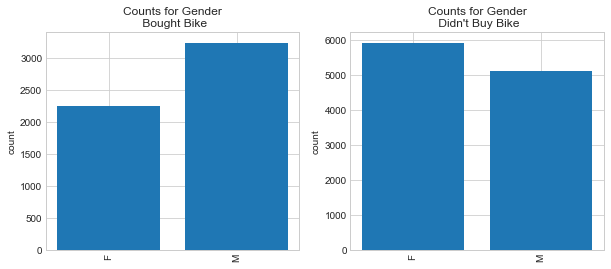

MaritalStatus


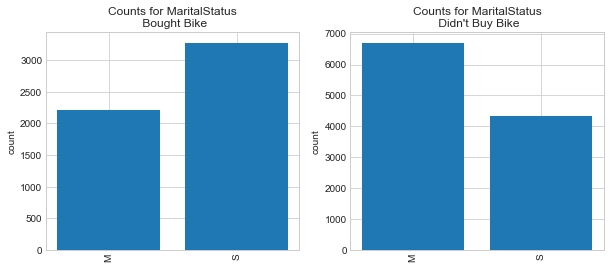

Education


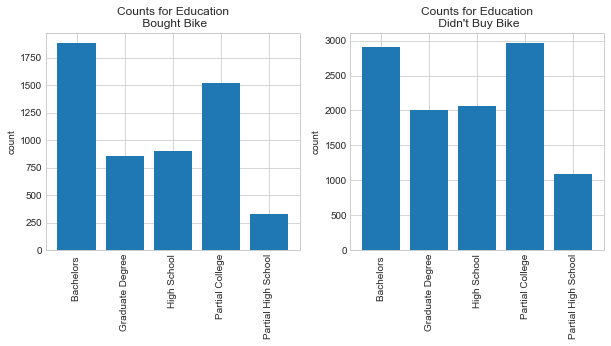

In [46]:
cat_cols = ['Occupation', 'Gender', 'MaritalStatus', 'Education']

AWS_dataset['dummy'] = np.ones(shape = AWS_dataset.shape[0])
for col in cat_cols:
    print(col)
    counts = AWS_dataset[['dummy', 'BikeBuyer', col]].groupby(['BikeBuyer', col], as_index = False).count()
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    
    temp = counts[counts['BikeBuyer'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Bought Bike')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Didn\'t Buy Bike')
    plt.ylabel('count')
    plt.show()

In [45]:
AWS_dataset.to_csv('AWS_Dataset_Preped.csv', index = False, header = True)